In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Elon_musk.csv to Elon_musk (1).csv


In [8]:
df = pd.read_csv('Elon_musk.csv' , encoding='latin1')
df.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [9]:
df=df.drop(columns='Unnamed: 0')
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [10]:
df.shape

(1999, 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [12]:
df.isna().any()

Text    False
dtype: bool

In [13]:
# converting dataframe into string
df.Text=df.Text.astype(str)

In [14]:
# Clean data using RegEX
import re

In [15]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"_[A-Za-z0-9]", "", text)#Removing underscores


    return text
df["Text"] = df["Text"].apply(cleantext)
df.head()

,Text
0,Im an alien
1,Aarmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [16]:
df.tail(10)

,Text
1989,"Sorry, should hopefully be soon!"
1990,"Not actually a payout, just a vesting of stoc..."
1991,"No easy way to answer this in a tweet, but he..."
1992,AI symbiosis while u wait
1993,Theres some of that too
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998,Progress update August 28


In [17]:
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [18]:
pip install wordcloud

In [19]:
from wordcloud import WordCloud,STOPWORDS

# Sentiment Values


In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentialz = SentimentIntensityAnalyzer()

In [21]:
sentialz.polarity_scores(df.Text.iloc[2])

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [22]:
def get_senti_class(review):
    analysis = sentialz.polarity_scores(review)
    if analysis["compound"] > 0:
        return 'positive'
    elif analysis["compound"] < 0:
        return 'negative'
    else:
        return 'neutral'

def get_senti(review):
    return pd.Series([sentialz.polarity_scores(review),get_senti_class(review)])

In [23]:
#Applying function to all tweets
df[["Scores", "Sentiment"]] = df.Text.apply(get_senti)
df

,Text,Scores,Sentiment
0,Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Aarmack Ray tracing on Cyberpunk with HDR is n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",positive
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
4,Congratulations Tesla China for amazing execu...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",positive
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative
1995,Make sure to read ur terms &amp; conditions b...,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",positive
1996,Samwise Gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...",negative


In [24]:
comp_values = [d.get('compound') for d in df.Scores]
df.Sentiment.value_counts()

neutral     884
positive    883
negative    232
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

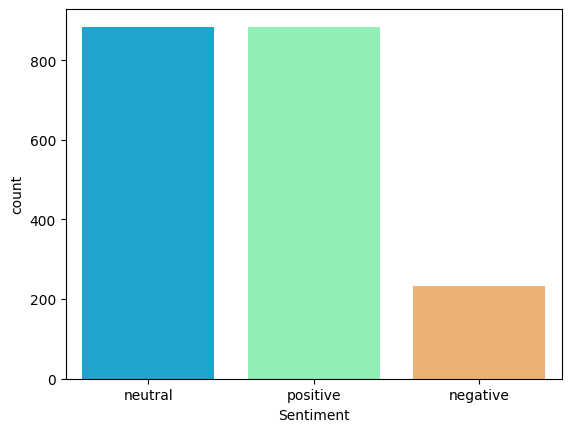

In [25]:
sns.countplot(x='Sentiment',data=df,palette='rainbow')

<Axes: >

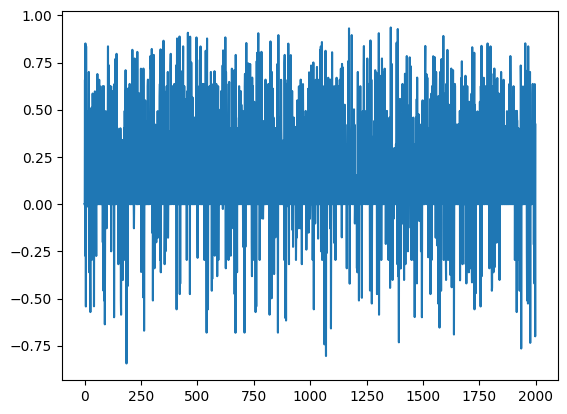

In [26]:
sns.lineplot(data = comp_values, palette='rainbow')

In [27]:
df.loc[df.Sentiment=='negative']

,Text,Scores,Sentiment
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
6,"Frodo was the underdoge,\nAll thought he would...","{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'comp...",negative
15,"He definitely has issues, but the sentencing ...","{'neg': 0.162, 'neu': 0.681, 'pos': 0.157, 'co...",negative
20,Any crypto wallet that wont give you your pr...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",negative
21,Your app sucks,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",negative
...,...,...,...
1965,That is the near-term danger of AI,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",negative
1975,Death is the loss of information,"{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...",negative
1991,"No easy way to answer this in a tweet, but he...","{'neg': 0.205, 'neu': 0.622, 'pos': 0.174, 'co...",negative
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative


In [28]:
df.loc[df.Sentiment=='positive']

,Text,Scores,Sentiment
2,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",positive
4,Congratulations Tesla China for amazing execu...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",positive
5,Happy New Year of the Ox!,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",positive
7,_ Haha thanks :),"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive
8,Indeed! Tweets definitely do not represent r...,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",positive
...,...,...,...
1988,Yes,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive
1989,"Sorry, should hopefully be soon!","{'neg': 0.178, 'neu': 0.411, 'pos': 0.41, 'com...",positive
1990,"Not actually a payout, just a vesting of stoc...","{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...",positive
1995,Make sure to read ur terms &amp; conditions b...,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",positive


In [29]:
df.loc[df.Sentiment=='neutral']

,Text,Scores,Sentiment
0,Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Aarmack Ray tracing on Cyberpunk with HDR is n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
10,Just sent some,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
12,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",neutral
13,Its getting real,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
...,...,...,...
1982,<U+0001F440>,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1983,Berlin Model Y is the one to watch. That is ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1992,AI symbiosis while u wait,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1993,Theres some of that too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


In [30]:
tweet_str = ' '.join(df['Text'].tolist())

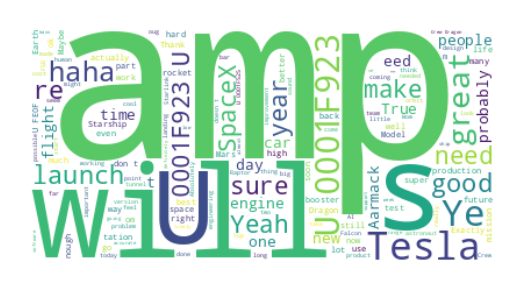

In [31]:
from matplotlib.pyplot import figure
wordcloud_ip = WordCloud(
                      background_color="white", max_words=500,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(tweet_str)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

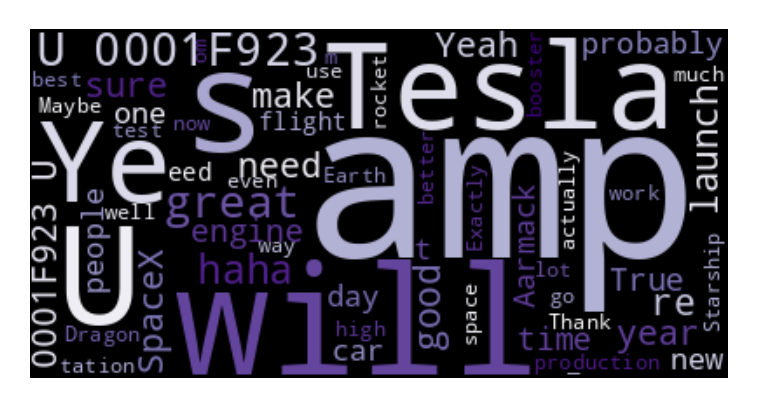

In [32]:
from PIL import Image
elon_mask = WordCloud(background_color='black',
                      max_words = 60,
                    stopwords = set(STOPWORDS),
                    colormap='Purples_r',

                    ).generate(tweet_str)

figure(figsize=(3,4), dpi=300)
plt.imshow(elon_mask,interpolation="bilinear")
plt.axis("off")
plt.show()